   TWITTER SENTIMENT ANALYSIS USING LSTM

Within this python notebook , we are going to do the twitter sentiment analysis, using the dataset from kaggle : https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis


In this notebook we are going to do 

1. Importing the Dataset
2. Differentiating Labels and Features
3. Text Preprocessing 
4. Label Encoding 
5. Tokenization
6. LSTM model architecture
7. model compilation and traininig
8. metrics visualization

In [1]:
#  Importing the Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

1. IMPORTING THE DATASET
2. DIFFERENTIATING THE LABELS

In [2]:
#  Training Dataset
df = pd.read_csv(r"M:\Dataset\RNN\Twitter_Analysis\twitter_training.csv")
feature = df.iloc[:,-1].values
label = df.iloc[:,-2].values

# Validation Dataset
val_df = pd.read_csv(r"M:\Dataset\RNN\Twitter_Analysis\twitter_validation.csv")
val_feature = val_df.iloc[:,-1].values
val_label = val_df.iloc[:,-2].values

3. TEXT PREPROCESSING

In [3]:
#  Functions to convert the data into lowercase , and remove its punctuations
def lower_case_and_remove_punctuation(arr):
    def process_string(s):
        if isinstance(s, str):
            s = s.lower()
            s = re.sub(r'[^\w\s]', '', s)
        return s

    process_func = np.vectorize(process_string)
    return process_func(arr)

In [4]:
feature = lower_case_and_remove_punctuation(feature)

4. LABEL ENCODING

In [5]:
# Encoding the Labels into Numeric Values
LE = LabelEncoder()

y = LE.fit_transform(label)
num_classes = np.unique(y)
print(num_classes)

[0 1 2 3]


5. TOKENIZATION

In [6]:
# Word Tokenization 
max_words = 5000  
max_len = 200    

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(feature)
sequences = tokenizer.texts_to_sequences(feature)

X = pad_sequences(sequences, maxlen=max_len)
print(tokenizer.texts_to_sequences("i am not a great guy"))

[[2], [], [5], [316], [], [656], [847], [164], [], [5], [], [1287], [605], [516], [5], [164], [], [1287], [200], [645]]


In [8]:
print(len(tokenizer.word_index))

40547


In [15]:
#  Preprocessing the validation dataset
val_feature  = lower_case_and_remove_punctuation(val_feature)
Sequences2 = tokenizer.texts_to_sequences(val_feature)

val_X = pad_sequences(Sequences2, maxlen=max_len)

val_y = LE.fit_transform(val_label)

6. MODEL ARCHITECTURE

In [16]:
#  Model Architecture serving Accuracy = 94.5 and Validation Accuracy = 94.10
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(len(num_classes), activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          640000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 689,668
Trainable params: 689,668
Non-trainable params: 0
_________________________________________________________________


7. MODEL COMPILATION

In [17]:
# Optimizers and Loss Function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

7. MODEL TRAINING

In [22]:
#  Model Training 
history = model.fit(X, y,batch_size = 76, epochs=10, validation_data=(val_X, val_y))

Epoch 1/10
983/983 [==============================] - 26s 27ms/step - loss: 0.2277 - accuracy: 0.9109 - val_loss: 0.3064 - val_accuracy: 0.9309
Epoch 2/10
983/983 [==============================] - 27s 27ms/step - loss: 0.2023 - accuracy: 0.9196 - val_loss: 0.3019 - val_accuracy: 0.9289
Epoch 3/10
983/983 [==============================] - 26s 27ms/step - loss: 0.1911 - accuracy: 0.9244 - val_loss: 0.2981 - val_accuracy: 0.9319
Epoch 4/10
983/983 [==============================] - 26s 26ms/step - loss: 0.1803 - accuracy: 0.9279 - val_loss: 0.2962 - val_accuracy: 0.9339
Epoch 5/10
983/983 [==============================] - 27s 27ms/step - loss: 0.1649 - accuracy: 0.9330 - val_loss: 0.3207 - val_accuracy: 0.9369
Epoch 6/10
983/983 [==============================] - 26s 26ms/step - loss: 0.1557 - accuracy: 0.9362 - val_loss: 0.2994 - val_accuracy: 0.9479
Epoch 7/10
983/983 [==============================] - 26s 27ms/step - loss: 0.1475 - accuracy: 0.9385 - val_loss: 0.3149 - val_accuracy:

8. METRICS VISUALIZATION

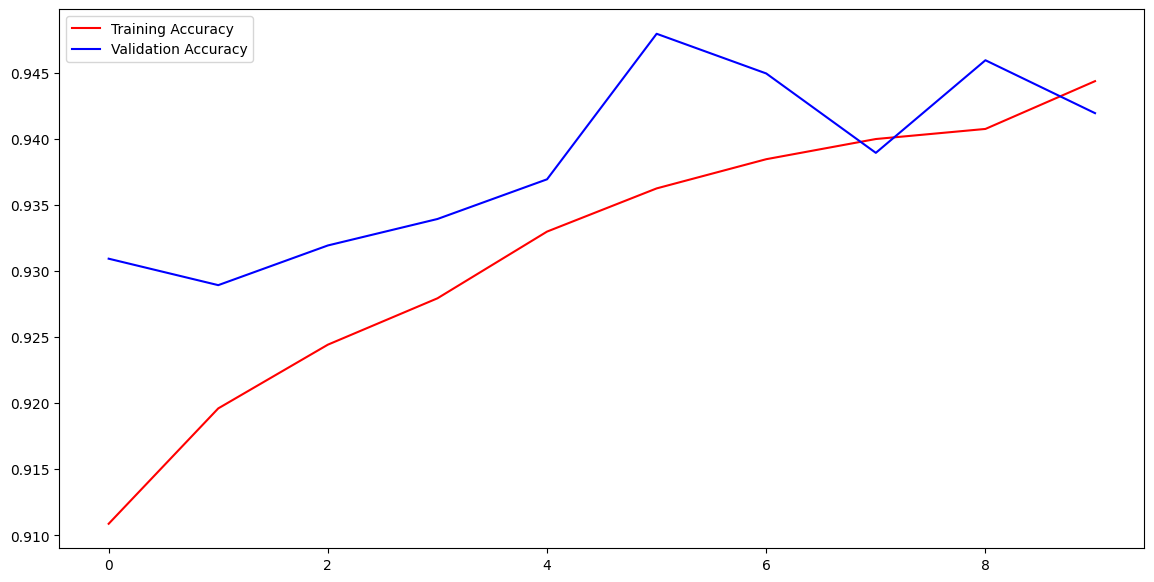

In [23]:
#  Accuracy and Validation Accuracy Visualization
import matplotlib.pyplot as plt
import seaborn as sns
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

In [24]:
model.save(r"M:\Internship\Week 1\Sentiment_Analysis\SA.keras")

EXAMPLES 

In [39]:
# Simple Use Cases
sample2 = [
        "do you know about that circus ?",
        "This admin is really good",
        "I just hate this Twitter",
        "Hmmmmmmmmmmm"
          ]
example2 = tokenizer.texts_to_sequences(sample2)

new_texts2 = pad_sequences(example2, maxlen=max_len)

prediction2 = model.predict(new_texts2)

predicted_indices = np.argmax(prediction2, axis=1)
predicted_labels = LE.inverse_transform(predicted_indices)

for sample, label in zip(sample2, predicted_labels):
    print(f"Sample: {sample} -> Predicted label: {label}")

1/1 [==============================] - 0s 60ms/step
Sample: do you know about that circus ? -> Predicted label: Irrelevant
Sample: This admin is really good -> Predicted label: Positive
Sample: I just hate this Twitter -> Predicted label: Negative
Sample: Hmmmmmmmmmmm -> Predicted label: Neutral
